In [2]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### In case that your tqdm is not installed. Please go to the Start(Windows)->Anaconda2(64-bit)->Anaconda Prompt(py35)

### type: conda install tqdm -y

In [3]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import os
import math
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import re
import codecs
from collections import Counter
import nltk
from nltk.stem import *
from nltk.corpus import stopwords
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import stats

C:\Users\sx449_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sx449_000\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# extract data
# !tar -xf 20news-19997.tar.gz -C .

In [4]:
# display newsgroups directories
# !ls 20_newsgroups

## Support functions

In [5]:
def getFilesDirectory(datapath='20_newsgroups'):
    # create file directory for all files
    files = []
    for (path, dirnames, filenames) in os.walk(datapath):
        files.extend(os.path.join(path, name) for name in filenames)
    # putting file directories into pandas dataframe
    directorydf= pd.DataFrame(files)
    directorydf.columns = ['Directories']
    return directorydf

In [6]:
directorydf = getFilesDirectory()

In [7]:
directorydf.shape

(19997, 1)

In [8]:
# create function to help encoding the targets
def label_target (d):
    if d.find("alt.atheism") > 0 :
      return 0
    if d.find("comp.graphics") > 0:
      return 1
    if d.find("comp.os.ms-windows.misc") > 0:
      return 2
    if d.find("comp.sys.ibm.pc.hardware") > 0:
      return 3
    if d.find("comp.sys.mac.hardware") > 0:
      return 4
    if d.find("comp.windows.x") > 0:
      return 5
    if d.find("misc.forsale") > 0:
      return 6
    if d.find("rec.autos") > 0:
      return 7
    if d.find("rec.motorcycles") > 0:
      return 8
    if d.find("rec.sport.baseball") > 0:
      return 9
    if d.find("rec.sport.hockey") > 0:
      return 10
    if d.find("sci.crypt") > 0:
      return 11
    if d.find("sci.electronics") > 0:
      return 12
    if d.find("sci.med") > 0:
      return 13
    if d.find("sci.space") > 0:
      return 14
    if d.find("soc.religion.christian") > 0:
      return 15
    if d.find("talk.politics.guns") > 0:
      return 16
    if d.find("talk.politics.mideast") > 0:
      return 17
    if d.find("talk.politics.misc") > 0:
      return 18
    if d.find("talk.religion.misc") > 0:
      return 19
    return 'Other'

## Q1

### (a)

(i) feature encoding method:
- features are stemed
- features are lowercased
- Stopwords and non-alphabets are eliminated
- features are encoded as term-frequency in each doc

<br>(ii) ranking features
- Term-frequency as feateare ranking method
- After feature encoding above, the TF is informative
- MI has its drawbacks
    - In the sparse document we have here, rare terms has higher MI score, but will eazily overfit.
    - $MI(t,c) = log \frac{P(t|c)}{P(t)*P(c)}$, thus if 2 terms have same likelihood in a doc, the lower term frequency one will have beter score, which doesn't make sense
    
<br>(iii) how many features to select
- By visualizing the features generated, it's found after 500, the feature becomes too sparse. Sparse data is not representative, and will also increase the risk of overfitting. So 500 is decided as an appropreate feature count.

### (b)

In [9]:
def dataPreprocessor(k, fs, encode, directorydf, size=None):
    """
    INPUT
        k: int. number of features to use
        fs: string. From ['tf', 'mi']
        encode: string. From ['tf', 'boolean']
        drectorydf: Dataframe. It is given, see above support functions
        size: int. Sample size. Default should be the data size.
    OUTPUT
        data: Dataframe. preprocessed data
    
    ps: 'tf' means term frequency, 'mi' means mutual information
    """
    
    ########### your code goes here ###########
    #### sample size selection ####
    if size is None:
        pass
    else:
        directorydf = directorydf[:size] # specify sample size to use
    #### end: sample size selection ####
    
    #### @ feature selection method  ####
    if fs == 'mi' :
        print('Mutual Information is not used here')
        pass
    
    elif fs == 'tf':
        
        counter = Counter()
        stopwords = nltk.corpus.stopwords.words('english')
        ps = PorterStemmer()
        # Open the files and count the word frequency in each file in a loop 
        # and update the counter after finished processing a file
        for rownum, row in tqdm(enumerate(directorydf.itertuples())):
            with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
                counter.update([word for word in re.findall(r'\w+', myfile.read())\
                                if word.lower() not in stopwords and word.isalpha()])
#             if (rownum % 1000 == 0):
#                 print("processed %d files" % (rownum+1))

    ### @ k feature size ####        
    # k as input, select topk most common words as features, top20 are useless
    topk = counter.most_common(k)
#     topk = topk[20:20+k]
    ### end feature size ####

    #### end feature selection ####
  
    # dataframe init'
    np = []
    # now we had top k words, count the frequecy (binary) of these words in individual file. ps.stem(word)
    for rownum, row in tqdm(enumerate(directorydf.itertuples())):
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())\
                            if word.lower() not in stopwords and word.isalpha()])
            ####  Select encode method from [tf, bool]
            if encode == 'boolean':
            # if the word appears in the doc, then 1, else 
                topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
            elif encode == 'tf':
                topkinDoc = [wordCount if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
            #### Finish selecting encode method ####

            # create a list for top k words with encoded target and its label
            np.append(topkinDoc+[label_target(row.Directories)]+[row.Directories])
#             if (rownum % 1000 == 0):
#                 print("processed %d files" % (rownum+1))
   
    # column names
    newsgroupdf = pd.DataFrame(np)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    
    newsgroupdf.columns = dfName+['target','label']
    ###########         end         ###########
    return newsgroupdf

In [10]:
data = dataPreprocessor(k=500, fs='tf', encode='tf', directorydf=directorydf, size=None)

19997it [00:36, 549.95it/s]
19997it [00:46, 434.67it/s]


In [11]:
type(data)

pandas.core.frame.DataFrame

### (c)

In [4]:
#Confidence Interval Function
import scipy.stats
from math import sqrt
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    mu,sd = np.mean(a),np.std(a)
    z = 2.01504837267
    h=z*sd/sqrt(n)
    return mu, (mu-h, mu+h)

2.01504837267


(3.0, 1.2744284906100645)

In [13]:
def randomSplitCI(data, clf, num_run, **params):
    """
    INPUT
        data: 2D numpy array. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        num_run: int. How many times you want to run for random evaluation?
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_scores: list. Results of trails
        test_scores: list. Results of trails
        train_mean: scalar. Average accuracy
        test_mean: scalar. Average accuracy
        train_ci: scalar. Confidence Interval
        test_ci: scalar. Confidence Interval
    """
    
    ########### your code goes here ###########
    ## Initil'
    if clf == 'LR':
        #### params
        C = params.get('c')
        if C: 
            clf_all = LogisticRegression(C=C)
        else: 
            clf_all = LogisticRegression()
        #### end params

    elif clf == 'NB':
        clf_all = GaussianNB()

    elif clf == 'SVM':
        # evaluate C in **kwarg
        C = params.get('c')
        if C:
            svc_clf = SVC(C=C, probability= True)
        else:
            svc_clf = SVC(C=1, probability= True)
        # evaluate cv in **kwarg
        cv = params.get('cv')
        clf_all = GridSearchCV(svc_clf, parameters, cv=5, scoring='accuracy') #5 folds
    # Score lists
    train_scores = []
    test_scores = []   
    # df to matrix
    features_df = data.iloc[:, :-2]
    features = features_df.as_matrix()
    target_df = data.iloc[:, -2]
    target = target_df.as_matrix()
    ## end Initil'
    
    for i in tqdm(range(num_run)):
        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

        clf_model = clf_all.fit(features_train, target_train) #train the model z    
        target_pred = clf_model.predict(features_test)
        train_pred = clf_model.predict(features_train)

        # train/test score single value
        temp_test_score = metrics.accuracy_score(target_test, target_pred)
        temp_train_score = metrics.accuracy_score(target_train, train_pred)

        # train/test score list
        train_scores.append(temp_train_score)
        test_scores.append(temp_test_score)
            
    ## Find scalars
    # train/test mean
#     train_mean = np.mean(train_scores)
#     test_mean = np.mean(test_scores)
    # train/test ci
    train_mean, train_ci = mean_confidence_interval(train_scores, confidence=0.95)
    test_mean, test_ci = mean_confidence_interval(test_scores, confidence=0.95)
    ## end Find scalars
    ###########         end         ###########
    return train_scores,test_scores,train_mean,test_mean,train_ci,test_ci
    

In [14]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)

100%|██████████████████████████████████████████| 10/10 [11:16<00:00, 71.91s/it]


In [15]:
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

Train    
Result of trails:[0.9807101521754662, 0.98235336143459318, 0.9814960348646139, 0.98249624919625633, 0.98142459098378221, 0.98085303993712936, 0.98121025934128747, 0.98156747874544548, 0.98121025934128747, 0.98056726441380293]     
Average Accuracy: 0.9813888690433664     
Confidence Interval: 0.0003480588355218925

Test    
Result of trails:[0.94566666666666666, 0.94199999999999995, 0.94333333333333336, 0.9418333333333333, 0.94350000000000001, 0.94350000000000001, 0.94366666666666665, 0.94216666666666671, 0.9458333333333333, 0.94466666666666665]     
Average Accuracy: 0.9436166666666667     
Confidence Interval: 0.0007737532180093897


Comparison
- The train acurracy score is higher than test acurracy score. This is because we trained the model on the trianing set.
But the model havn't seen the test set before, so the accuracy is lower.

### (d)

It tells us the average acurracy-score over entire family will fall in the range of $[\mu \pm h]$.
It's more informative as it use Student's t-distribution to estimate the mean of entire population by doing statistical sampling.

### (e)

In [16]:
def randomSplitCM(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        cm: pandas.DataFrame. Confusion Matrix
    """
    ########### your code goes here ###########
    ## Initil'
    # df to matrix
    features_df = data.iloc[:, :-2]
    features = features_df.as_matrix()
    target_df = data.iloc[:, -2]
    target = target_df.as_matrix()
    labels = target_df.unique()
    cms = {}
    cv = StratifiedKFold(target, n_folds=10)
    ## end Initil'
    
    for i, (train, test) in tqdm(enumerate(cv)):
        if clf == 'LR':
            #### params
            C = params.get('c')
            if C: 
                clfLR = LogisticRegression(C=C)
            else: 
                clfLR = LogisticRegression()
            #### end params
            clfModel = clfLR.fit(features[train], target[train])
            target_pred = clfModel.predict(features[test])
            cms[i] = pd.DataFrame(metrics.confusion_matrix(target[test], target_pred), columns=labels, index=labels)


        elif clf == 'NB':
            gnb = GaussianNB()
            gnbModel = gnb.fit(features[train], target[train])
            target_predNB = gnbModel.predict(features[test])
            cms[i] = pd.DataFrame(metrics.confusion_matrix(target[test], target_predNB), columns=labels, index=labels)

        elif clf == 'SVM':
            # evaluate C in **kwarg
            C = params.get('c')
            if C:
                svc_clf = SVC(C=C, probability= True)
            else:
                svc_clf = SVC(C=1, probability= True)
            # evaluate cv in **kwarg
            cv = params.get('cv')
            if cv:
                clfSVM = GridSearchCV(svc_clf, parameters, cv=cv, scoring='accuracy') # customized folds
            else:
                clfSVM = GridSearchCV(svc_clf, parameters, cv=5, scoring='accuracy') #5 folds
            clfSVM.fit(features[train], target[train]) #train the model 
            target_predSVM = clfSVM.predict(features[test])
            cms[i] = pd.DataFrame(metrics.confusion_matrix(target[test], target_predSVM), columns=labels, index=labels)
        # Panel of all test set confusion matrices
    pl = pd.Panel(cms)
    cm = pl.sum(axis=0) #Sum the confusion matrices to get one view of how well the classifiers perform

    ###########         end         ###########
    return cm

In [17]:
cm = randomSplitCM(data, 'LR', 10, c=1.0)

10it [09:46, 50.95s/it]
C:\Users\sx449_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


### (f)

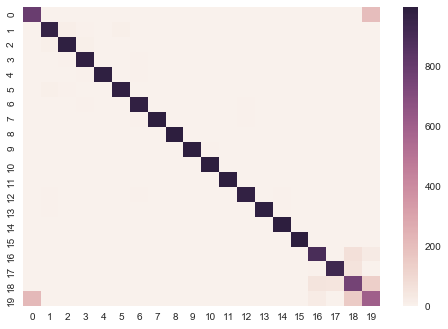

In [18]:
sns.heatmap(cm)

class 18 is more easily confused with class 16, 17 and 19. This may because topic 16-19 are all about politics, thus the features are similar in those classes, and can ealisy be misclassified.

## Q2

In [27]:
# with subsampling and random feature
def featureSizeAC(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_mean_fs list.
        train_ci_fs: list.
        test_mean_fs: list.
        test_ci_fs: list.
        
    """
    feature_percentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    ########### your code goes here ###########
    ## Initil'
    # Define clf type
    if clf == 'LR':
        #### params
        C = params.get('c')
        if C: 
            clf_all = LogisticRegression(C=C)
        else: 
            clf_all = LogisticRegression()
        #### end params

    elif clf == 'NB':
        clf_all = GaussianNB()

    elif clf == 'SVM':
        # evaluate C in **kwarg
        C = params.get('c')
        if C:
            svc_clf = SVC(C=C, probability= True)
        else:
            svc_clf = SVC(C=1, probability= True)
        clf_all = GridSearchCV(svc_clf, parameters, cv=5, scoring='accuracy') #5 folds
        
    # df to matrix
    features_df = data.iloc[:, :-2]
    features = features_df.as_matrix()
    fs = features.shape[1]
    target_df = data.iloc[:, -2]
    target = target_df.as_matrix()
    idx= np.random.permutation(range(fs))
    temp_fs_list = [math.floor(fs*percentage) for percentage in feature_percentage]
    features = features[:,idx]
    
    train_mean_fs = []
    test_mean_fs = []
    train_ci_fs = []
    test_ci_fs = []
    ## end Initil'
    for temp_fs in tqdm(temp_fs_list): # do for all percentages
        temp_features = features[:,:temp_fs]
        train_scores = []
        test_scores = []
#         features_train, features_test, target_train, target_test = \
#         train_test_split(temp_features, target, test_size=0.3)
        cv = StratifiedKFold(target, n_folds=num_run)
        ###
        for i, (train, test) in tqdm(enumerate(cv)):
#         for j in tqdm(range(num_run)):
            ##
            clf_model = clf_all.fit(temp_features[train], target[train]) #train the model z    
            target_pred = clf_model.predict(temp_features[test])
            train_pred = clf_model.predict(temp_features[train])
            
            # train/test score single value
            temp_test_score = metrics.accuracy_score(target[test], target_pred)
            temp_train_score = metrics.accuracy_score(target[train], train_pred)
            # train/test score list    
            train_scores.append(temp_train_score)
            test_scores.append(temp_test_score)
            # append as result for per percentage
            ##
        ###
        mu_train,h_train = mean_confidence_interval(train_scores, confidence=0.95)
        mu_test,h_test = mean_confidence_interval(test_scores, confidence=0.95)
        
        train_mean_fs.append(mu_train)
        test_mean_fs.append(mu_test)
        train_ci_fs.append(h_train)
        test_ci_fs.append(h_test)
    ###########         end         ###########
    return train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs

### (a)

In [28]:
train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs = featureSizeAC(data, 'LR', 10, c=1.0)



  0%|                                                   | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

1it [00:05,  5.70s/it]
2it [00:11,  5.61s/it]
3it [00:16,  5.53s/it]
4it [00:21,  5.45s/it]
5it [00:27,  5.43s/it]
6it [00:32,  5.52s/it]
7it [00:37,  5.40s/it]
8it [00:43,  5.30s/it]
9it [00:48,  5.29s/it]
10it [00:53,  5.38s/it]
 10%|████▎                                      | 1/10 [00:53<08:05, 53.90s/it]
0it [00:00, ?it/s]
1it [00:14, 14.43s/it]
2it [00:27, 14.17s/it]
3it [00:41, 14.01s/it]
4it [00:55, 13.85s/it]
5it [01:08, 13.71s/it]
6it [01:22, 13.77s/it]
7it [01:37, 14.22s/it]
8it [01:51, 14.20s/it]
9it [02:05, 14.15s/it]
10it [02:19, 14.14s/it]
 20%|████████▌                                  | 2/10 [03:13<10:37, 79.73s/it]
0it [00:00, ?it/s]
1it [00:28, 28.79s/it]
2it [00:58, 29.05s/it]
3it [01:29, 29.59s/it]
4it [02:12, 33.59s/it]
5it [03:05, 39.43s/it]
6it [03:55, 42.70s/it]
7it [04:41, 43.76s/it]
8it [05:32, 45.86s/it]
9it [06:23, 47.30s/it]
10it [07:21, 50.59s/it]
 30%|██

Wall time: 1h 45min 4s


### (b)

In [33]:
train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs 

([0.34526290181971098,
  0.58572671447513114,
  0.75764145983190156,
  0.85674521521264779,
  0.90411895395414255,
  0.96698951745257289,
  0.97056227988214727,
  0.97579639821315056,
  0.97598531766258545,
  0.97605755130639582],
 [0.0015359246108029917,
  0.0014751036719894083,
  0.00099322567216137748,
  0.001121739378423244,
  0.00069587179998940472,
  0.00076028113670977731,
  0.00088769950565163378,
  0.00088093020609531902,
  0.00093069087652985843,
  0.0009546408348813266],
 [0.32414849924962474,
  0.54653051525762875,
  0.6983568284142071,
  0.79427086043021511,
  0.83667721360680347,
  0.90403784392196107,
  0.91323949474737365,
  0.93094192096048034,
  0.93239204602301162,
  0.93854287143571768],
 [0.012876434849046976,
  0.0093235535237647989,
  0.0091750575712238689,
  0.00794347378421968,
  0.0067711831038641925,
  0.0074644813329488875,
  0.0080939028553518831,
  0.0072522369640587179,
  0.0070473773239776733,
  0.0069809005586884045])

In [31]:
def featureSizePlot(feature_size, train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(feature_size, test_mean_fs, color=sns.xkcd_rgb["pale red"], yerr=test_ci_fs)
    train_curve=plt.errorbar(feature_size, train_mean_fs,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_fs)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Feature Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Feature Size")
    plt.show()

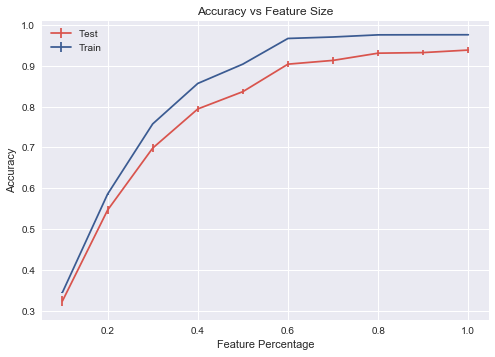

In [32]:
featureSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs )

## Q3

In [ ]:
def hyperParameterAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
    
    OUTPUT
        test_mean_hp: list.  mean accuracy list of test
        test_ci_hp: list. confidence interval list of test
        train_mean_hp: list. mean accuracy list of train
        train_ci_hp: list. confidence interval list of train
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    params = np.logspace(-9, 9, num=9)
    
    ########### your code goes here ###########
    ## Initil'
    # Score lists
  
    # df to matrix
    features_df = data.iloc[:, :-2]
    features = features_df.as_matrix()
    target_df = data.iloc[:, -2]
    target = target_df.as_matrix()
    
    train_mean_hp = []
    test_mean_hp = []
    train_ci_hp = []
    test_ci_hp = []
    ## end Initil'
    for C in tqdm(params): # do for all percentages
        train_scores = []
        test_scores = []
        for j in tqdm(range(num_run)):
            features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
            if clf == 'LR':
                clf_all = LogisticRegression(C=C)

                #### end params                

            elif clf == 'NB':
                clf_all = GaussianNB()
                
            elif clf == 'SVM':
                # evaluate C in **kwarg
                svc_clf = SVC(C=C, probability= True)
                # evaluate cv in **kwarg
                cv = params.get('cv')
                clf_all = GridSearchCV(svc_clf, parameters, cv=5, scoring='accuracy') #5 folds
                
            clf_model = clf_all.fit(features_train, target_train) #train the model z    
            target_pred = clf_model.predict(features_test)
            train_pred = clf_model.predict(features_train)
            
            # train/test score single value
            temp_test_score = metrics.accuracy_score(target_test, target_pred)
            temp_train_score = metrics.accuracy_score(target_train, train_pred)
            # train/test score list    
            train_scores.append(temp_train_score) 
            test_scores.append(temp_test_score) 
            # append as result for per percentage
        mu_train,h_train = mean_confidence_interval(train_scores, confidence=0.95)
        mu_test,h_test = mean_confidence_interval(test_scores, confidence=0.95)
        
        train_mean_hp.append(mu_train)
        test_mean_hp.append(mu_test)
        train_ci_hp.append(h_train)
        test_ci_hp.append(h_test)
    ###########         end         ###########
    return train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp

In [ ]:
train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp = hyperParameterAC(data, 'LR', 3)

In [ ]:
def hyperParameterPlot(params, train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(params, test_mean_hp, color=sns.xkcd_rgb["pale red"], yerr=test_ci_hp)
    train_curve=plt.errorbar(params, train_mean_hp,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_hp)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Parameter')
    plt.xscale("log")
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Parameters")
    plt.show()

In [ ]:
hyperParameterPlot(np.logspace(-9, 9, num=9),train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp )

## Q4

### (a)

In [ ]:
def dataSizeAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        test_mean_ds: list.  mean accuracy list of test
        test_ci_ds: list. confidence interval list of test
        train_mean_ds: list. mean accuracy list of train
        train_ci_ds: list. confidence interval list of train
        
        
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    data_percentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    ########### your code goes here ###########
    # Score lists
  
    # df to matrix
#     features_df = data.iloc[:, :-2]
#     features = features_df.as_matrix()
    ds = data.shape[0]
    idx = np.random.permutation(range(ds))
    data = data.iloc[idx]
#     target_df = data.iloc[:, -2]
#     target = target_df.as_matrix()
    temp_ds_list = [math.floor(ds*percentage) for percentage in data_percentage]
    
    train_mean_ds = []
    test_mean_ds = []
    train_ci_ds = []
    test_ci_ds = []
    ## end Initil'
    for temp_ds in tqdm(temp_ds_list): # do for all percentages
        temp_features = data.iloc[:temp_ds, :-2].as_matrix()
        temp_target = data.iloc[:temp_ds, -2].as_matrix()

        train_scores = []
        test_scores = []
        for j in tqdm(range(num_run)):
            features_train, features_test, target_train, target_test \
            = train_test_split(temp_features, temp_target, test_size=0.3)
            if clf == 'LR':
                clf_all = LogisticRegression()
                #### end params
            elif clf == 'NB':
                clf_all = GaussianNB()

            elif clf == 'SVM':
                # evaluate C in **kwarg
                svc_clf = SVC(C=1, probability= True)
                # evaluate cv in **kwarg
                cv = params.get('cv')
                clf_all = GridSearchCV(svc_clf, parameters, cv=5, scoring='accuracy') #5 folds

            clf_model = clf_all.fit(features_train, target_train) #train the model z    
            target_pred = clf_model.predict(features_test)
            train_pred = clf_model.predict(features_train)
            
            # train/test score single value
            temp_test_score = metrics.accuracy_score(target_test, target_pred)
            temp_train_score = metrics.accuracy_score(target_train, train_pred)
            # train/test score list    
            train_scores.append(temp_train_score)
            test_scores.append(temp_test_score)
            # append as result for per percentage
        
        train_mean_ds.append(np.mean(train_scores))
        test_mean_ds.append(np.mean(test_scores))
        
        ## Find scalars
        # train/test ci
        train_ci_ds.append(mean_confidence_interval(train_scores, confidence=0.95)[1])
        test_ci_ds.append(mean_confidence_interval(test_scores, confidence=0.95)[1])

    ###########         end         ###########
    return train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds

In [ ]:
train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds = dataSizeAC(data, 'LR', 3)

In [ ]:
print(train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds)

### (b)

In [ ]:
def dataSizePlot(datasize, train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(datasize, test_mean_ds, color=sns.xkcd_rgb["pale red"], yerr=test_ci_ds)
    train_curve=plt.errorbar(datasize, train_mean_ds,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_ds)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Data Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Data Percentage")
    plt.show()

In [ ]:
dataSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds)

## Q5

### (a)

In [ ]:
TF_1st = data.iloc[0]
TF_1st

In [ ]:
# Bool_data
Bool = dataPreprocessor(k=500, fs='tf', encode='boolean', directorydf=directorydf) 

In [ ]:
Bool.iloc[1]

In [ ]:
%%time
train_scores_b,test_scores_b,train_mean_b,test_mean_b,train_ci_b,test_ci_b = randomSplitCI(Bool, 'LR', 5, c=1.0)

In [ ]:
print("Train\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(train_mean_b, train_ci_b, [train_mean_b-train_ci_b, train_mean_b+train_ci_b])
     )
print("Test\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(test_mean_b, test_ci_b, [test_mean_b-test_ci_b,test_mean_b+test_ci_b])
     )

In [ ]:
%%time
train_scores_t,test_scores_t,train_mean_t,test_mean_t,train_ci_t,test_ci_t = randomSplitCI(data, 'LR', 5, c=1.0)

In [ ]:
print("Train\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(train_mean_t, train_ci_t, [train_mean_t-train_ci_t, train_mean_t+train_ci_t])
     )
print("Test\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(test_mean_t, test_ci_t, [test_mean_t-test_ci_t,test_mean_t+test_ci_t])
     )

You should be able to get this answer easily by running dataPreprocessor fuction and randomSplitCI function

### (b)

Binary encoding has a little bit higher accuracy than TF encoding. Because in this case, document frequency is not considered，and terms with very high TF may cause the model overfits the data.

## Q6

In [ ]:
train_scores_nb,test_scores_nb,train_mean_nb,test_mean_nb,train_ci_nb,test_ci_nb = randomSplitCI(data, 'LR', 3, c=1.0)

In [ ]:
print("Train\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(train_mean_nb, train_ci_nb, [train_mean_nb-train_ci_nb, train_mean_nb+train_ci_nb])
     )
print("Test\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(test_mean_nb, test_ci_nb, [test_mean_nb-test_ci_nb,test_mean_nb+test_ci_nb])
     )

In [ ]:
train_scores_b6,test_scores_b6,train_mean_b6,test_mean_b6,train_ci_b6,test_ci_b6 = randomSplitCI(Bool, 'LR', 3, c=1.0)

print("Train\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(train_mean_b6, train_ci_b6, [train_mean_b6-train_ci_b6, train_mean_b6+train_ci_b6])
     )
print("Test\
    \nAverage Accuracy: {0} \
    \nConfidence Interval: {1}\
    \nInterval:{2}".format(test_mean_b6, test_ci_b6, [test_mean_b6-test_ci_b6,test_mean_b6+test_ci_b6])
     )

### (a)

The Boolean encoded logistic regression performs better than Naive Bayes.
Naive Bayes assume for a known class, the value of each feature in the class is independent from values of other features, which doesn't hold in this case.